In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex',
   preamble=[r'\usepackage{sansmath}',
             r'\usepackage{amsfonts}',
             r'\sansmath']) #r'\usepackage{DejaVuSans}'
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans']})

rc('xtick.major', pad=12)
rc('ytick.major', pad=12)
rc('grid', linewidth=1.3)

%matplotlib inline

from colors import *

<ipython-input-1-d2d7e27a0e37>:8: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  rc('text.latex',


In [2]:
sns.set_style("whitegrid")

In [3]:
# sanae_colors = [sns.cubehelix_palette(as_cmap=False)[i] for i in range(6)]

In [4]:
arr = np.load("data/laplace.npz")

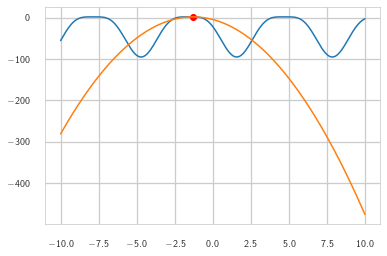

In [5]:
imap = np.argmax(arr["log_posterior"][210:300]) + 210
w_map = arr["ws"][imap]
log_posterior = arr["log_posterior"]
log_posterior -= scipy.special.logsumexp(arr["log_posterior"]) - np.log(len(arr["ws"]))
laplace_log_posterior = arr["laplace_logposteriors"]
laplace_log_posterior -= scipy.special.logsumexp(laplace_log_posterior) - np.log(len(arr["ws"]))
laplace_log_posterior += np.max(log_posterior) - np.max(laplace_log_posterior)

plt.plot(arr["ws"], log_posterior)
plt.plot(w_map, log_posterior[imap], "ro")
plt.plot(arr["ws"], laplace_log_posterior)
# plt.ylim(1, 2)

In [6]:
# plt.figure(figsize=(4, 3))
# plt.plot(arr["ws"], np.exp(log_posterior), color=color12, lw=2)
# plt.fill_between(
#     arr["ws"], np.zeros_like(arr["ws"]), np.exp(log_posterior),
#     color=color1, alpha=0.5, label="Posterior")

# plt.plot(arr["ws"], np.exp(laplace_log_posterior), color="k", lw=2)
# plt.fill_between(
#     arr["ws"], np.zeros_like(arr["ws"]), np.exp(laplace_log_posterior),
#     color=color5, alpha=1., label="Laplace")

# plt.plot(w_map, np.exp(log_posterior[imap]), "ro", mec="k", mew=2, ms=8)
# plt.text(w_map + 1, 5.2, r"$w_{\small MAP}$", rotation=0, fontsize=18)

# plt.legend(fontsize=16, loc=(0.45, 0.1), framealpha=.93)

# plt.xlabel(r"$w$", fontsize=14)
# plt.ylabel(r"$p(w \vert \mathcal{D}$)", fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig("../../Papers/marginal_likelihood/figures/toy_laplace/posterior.pdf", bbox_inches="tight")

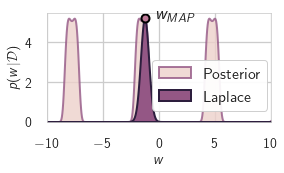

In [8]:
plt.figure(figsize=(4, 2))
# plt.plot(arr["ws"], np.exp(log_posterior), color=sanae_colors[2], lw=2)
plt.fill_between(
    arr["ws"], np.zeros_like(arr["ws"]), np.exp(log_posterior),
    facecolor=sanae_colors[0], edgecolor=sanae_colors[3],
    alpha=0.8, label="Posterior", linewidth=2)

# plt.plot(arr["ws"], np.exp(laplace_log_posterior), color=sanae_colors[5], lw=2)
plt.fill_between(
    arr["ws"], np.zeros_like(arr["ws"]), np.exp(laplace_log_posterior),
    facecolor=sanae_colors[3], edgecolor=sanae_colors[5],
    alpha=1., label="Laplace", linewidth=2)

plt.plot(w_map, np.exp(log_posterior[imap]), "o", c=sanae_colors[2], mec="k", mew=2, ms=8)
plt.text(w_map + 1, 5.2, r"$w_{\small MAP}$", rotation=0, fontsize=18)

plt.legend(fontsize=16, loc=(0.47, 0.1), framealpha=.93)

plt.xlabel(r"$w$", fontsize=14)
plt.ylabel(r"$p(w \vert \mathcal{D}$)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 5.5)
plt.xlim(-10, 10.)
plt.savefig("../../Papers/marginal_likelihood/figures/toy_laplace/posterior.pdf", bbox_inches="tight")

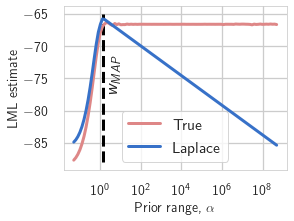

In [46]:
# plt.figure(figsize=(4, 3))
# plt.plot(arr["alphas"], arr["lmls"], lw=3, c=color5, label="True")
# plt.plot(arr["alphas"], arr["laplace_lmls"], lw=3, c=color12, label="Laplace")

# plt.vlines(np.abs(w_map), -88, -65, color="k", ls="dashed", lw=3)
# plt.text(w_map + 3, -77, r"$w_{\small MAP}$", rotation=90, fontsize=18)

# plt.legend(fontsize=16)#, loc=(0.5, 0.5))
# plt.xscale("log")
# plt.xlabel(r"Prior range, $\alpha$", fontsize=14)
# plt.ylabel(r"LML estimate", fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.savefig("../../Papers/marginal_likelihood/figures/toy_laplace/lmls.pdf", bbox_inches="tight")

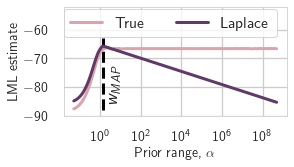

In [22]:
plt.figure(figsize=(4, 2))
plt.plot(arr["alphas"], arr["lmls"], lw=3, c=sanae_colors[1], label="True")
plt.plot(arr["alphas"], arr["laplace_lmls"], lw=3, c=sanae_colors[4], label="Laplace")

plt.vlines(np.abs(w_map), -88, -63, color="k", ls="dashed", lw=3)
plt.text(w_map + 3, -85, r"$w_{\small MAP}$", rotation=90, fontsize=18)

plt.legend(fontsize=16, ncol=2, loc=(0., 0.72))
plt.xscale("log")
plt.xlabel(r"Prior range, $\alpha$", fontsize=14)
plt.ylabel(r"LML estimate", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-90, -52)
plt.savefig("../../Papers/marginal_likelihood/figures/toy_laplace/lmls.pdf", bbox_inches="tight")